In [29]:
import numpy as np
import pandas as pd

In [30]:
airbnb = pd.read_csv('airbnb prices.csv')

airbnb.head(n=5)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
0,10176931,1476,49180562,Shared room,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,7,4.5,2,1,NaN,156,NaN,Red Light/ Canal view apartment (Shared),06:27.4,52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...
1,8935871,1476,46718394,Shared room,NaN,Amsterdam,NaN,Centrum West,45,4.5,4,1,NaN,126,NaN,Sunny and Cozy Living room in quite neighbours,06:23.6,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...
2,14011697,1476,10346595,Shared room,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,3,1,NaN,132,NaN,Amsterdam,06:23.6,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...
3,6137978,1476,8685430,Shared room,NaN,Amsterdam,NaN,Centrum West,7,5.0,4,1,NaN,121,NaN,Canal boat RIDE in Amsterdam,06:22.7,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...
4,18630616,1476,70191803,Shared room,NaN,Amsterdam,NaN,De Baarsjes / Oud West,1,0.0,2,1,NaN,93,NaN,One room for rent in a three room appartment,06:19.7,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...


In [31]:
airbnb.tail(n=5)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
18718,17789893,1476,47501089,Private room,NaN,Amsterdam,NaN,Bijlmer Centrum,10,5.0,3,1,NaN,32,NaN,"1-3 pers. Cozy Rm AFAS Live, ArenA, ZIGGODOME",05:14.2,52.319794,4.955638,0101000020E6100000684293C492D2134080BA8102EF28...
18719,16877166,1476,67093870,Private room,NaN,Amsterdam,NaN,Bijlmer Centrum,6,5.0,4,1,NaN,24,NaN,"Modern Room by Arena, ZIGGO, HmH",05:14.2,52.319080,4.954822,0101000020E61000005801BEDBBCD1134062670A9DD728...
18720,19859427,1476,29724632,Private room,NaN,Amsterdam,NaN,Geuzenveld / Slotermeer,0,0.0,1,1,NaN,38,NaN,Private single room,05:14.1,52.384028,4.838403,0101000020E61000002079E750865A1340C85F5AD42731...
18721,17132164,1476,115156569,Private room,NaN,Amsterdam,NaN,Centrum West,13,4.5,2,1,NaN,36,NaN,City Center studio in Touristic Amsterdam 1,05:14.1,52.372120,4.890982,0101000020E6100000774CDD955D9013400118CFA0A12F...
18722,7605782,1476,39503013,Private room,NaN,Amsterdam,NaN,Centrum West,113,4.5,2,1,NaN,35,NaN,I have a room available for rent,05:12.3,52.381392,4.899658,0101000020E6100000CD565EF23F9913405F7AFB73D130...


In [33]:
sharedroom = airbnb[(airbnb['room_type'] == 'Shared room')].index
airbnb.drop(sharedroom,inplace=True)

In [35]:
airbnb['neighborhood'].value_counts() #how popular count of neighborhood 

De Baarsjes / Oud West                    3280
De Pijp / Rivierenbuurt                   2371
Centrum West                              2217
Centrum Oost                              1724
Westerpark                                1424
Noord-West / Noord-Midden                 1416
Oud Oost                                  1167
Bos en Lommer                              985
Oostelijk Havengebied / Indische Buurt     916
Watergraafsmeer                            515
Oud Noord                                  492
Ijburg / Eiland Zeeburg                    378
Slotervaart                                346
Buitenveldert / Zuidas                     248
Noord West                                 241
Noord Oost                                 221
Geuzenveld / Slotermeer                    192
Osdorp                                     161
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             98
Bijlmer Oost                                97
Gaasperdam / 

In [36]:
airbnb['reviews'].value_counts()

0      2975
1      1500
2      1238
3      1100
4       924
       ... 
310       1
390       1
447       1
215       1
183       1
Name: reviews, Length: 283, dtype: int64

In [132]:
airbnb['overall_satisfaction'].value_counts() #overall_satisfaction count by each 

5.0    7697
0.0    5721
4.5    4543
4.0     573
3.5     105
3.0      19
2.5       1
1.0       1
Name: overall_satisfaction, dtype: int64

Text(0, 0.5, 'Arrival delay (in minutes)')

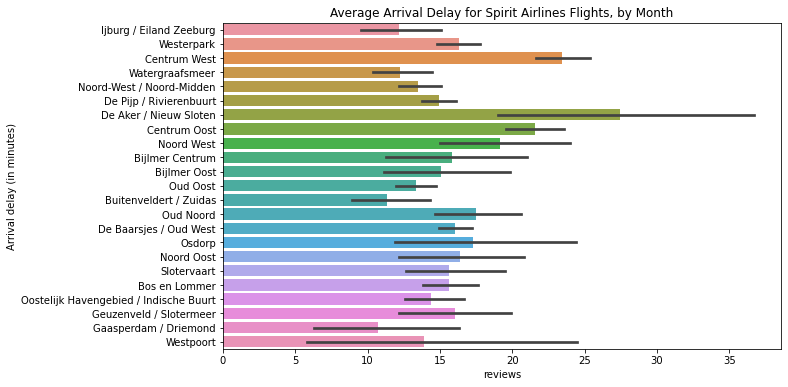

In [147]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=airbnb['reviews'], y=airbnb['neighborhood'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")


In [114]:
sub = airbnb[airbnb['overall_satisfaction']==0.0] #subset of airbnb dataset that has 0 rating

In [116]:
sub.shape

(5721, 20)

In [118]:
sub.head(5)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
34,3119298,1476,15847782,Entire home/apt,NaN,Amsterdam,NaN,Westerpark,1,0.0,8,3,NaN,445,NaN,Modern 5-8 person apartment,58:15.9,52.377581,4.873119,0101000020E61000009D103AE8127E1340A54BFF925430...
36,10511291,1476,5421078,Entire home/apt,NaN,Amsterdam,NaN,Watergraafsmeer,1,0.0,8,3,NaN,1412,NaN,Whole house 200m2 Frankendael Park,30:42.2,52.350968,4.929821,0101000020E61000003B8908FF22B81340A5F8F884EC2C...
37,18047871,1476,9302267,Entire home/apt,NaN,Amsterdam,NaN,Centrum West,0,0.0,4,4,NaN,541,NaN,Great 4 bedroom apartment at the flower market,30:27.6,52.367890,4.889273,0101000020E6100000FDDCD0949D8E13404243FF04172F...
38,7468232,1476,7215538,Entire home/apt,NaN,Amsterdam,NaN,Noord-West / Noord-Midden,2,0.0,4,2,NaN,594,NaN,MuseumSquare apartment with garden,30:27.6,52.355169,4.883219,0101000020E6100000C4D2C08F6A881340C9C6832D762D...
40,5818567,1476,29561840,Entire home/apt,NaN,Amsterdam,NaN,De Aker / Nieuw Sloten,0,0.0,4,2,NaN,361,NaN,"Luxurous, modern, bright appartment",29:20.7,52.346007,4.811830,0101000020E61000008FA50F5D503F1340F29716F5492C...


In [113]:
airbnb.describe()

,room_id,survey_id,host_id,country,borough,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,latitude,longitude
count,1.866000e+04,18660.0,1.866000e+04,0.0,0.0,18660.000000,18660.000000,18660.000000,18660.000000,0.0,18660.000000,0.0,18660.000000,18660.000000
mean,1.120262e+07,1476.0,3.575860e+07,NaN,NaN,16.729207,3.303778,2.921543,1.431833,NaN,166.811897,NaN,52.365261,4.888606
std,6.084245e+06,0.0,3.758082e+07,NaN,NaN,33.506653,2.213003,1.319141,0.880145,NaN,108.961385,NaN,0.015141,0.034530
min,2.818000e+03,1476.0,2.234000e+03,NaN,NaN,0.000000,0.000000,1.000000,0.000000,NaN,12.000000,NaN,52.296200,4.763264
25%,6.047014e+06,1476.0,7.125411e+06,NaN,NaN,2.000000,0.000000,2.000000,1.000000,NaN,108.000000,NaN,52.355252,4.864372
50%,1.228306e+07,1476.0,1.987107e+07,NaN,NaN,6.000000,4.500000,2.000000,1.000000,NaN,144.000000,NaN,52.364623,4.885995
75%,1.661017e+07,1476.0,5.201818e+07,NaN,NaN,17.000000,5.000000,4.000000,2.000000,NaN,192.000000,NaN,52.374789,4.907502
max,2.000373e+07,1476.0,1.418319e+08,NaN,NaN,532.000000,5.000000,17.000000,10.000000,NaN,6000.000000,NaN,52.424980,5.027689


In [176]:
airbnb['count'] = 1
#airbnb.loc[airbnb['bedrooms'] == 3]
beds_2 = airbnb.loc[(airbnb['reviews']) & (airbnb['bedrooms'] == 2.0), 'bedrooms']
beds_3 = airbnb.loc[(airbnb['reviews']) & (airbnb['bedrooms'] == 3.0), 'bedrooms']
beds_2.shape


(1964,)

In [177]:
beds_3.shape

(573,)